In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

/Users/shradheyprasad/Desktop/state_model/gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

/Users/shradheyprasad/Desktop/state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_7-2050-12_simple"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_7-2050-12_simple


In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

Importing data for subscenario solver_options_id, table options_solver from /Users/shradheyprasad/Desktop/state_model/input_csvs_gridpath/TN_7-2050-12_simple/solver...
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
...importing CSV 1_glpk.csv
   ...importing data from 1_glpk.csv
...importing CSV 5_ipopt.csv
   ...importing data from 5_ipopt.csv
...importing CSV 3_cplex_high_mipgap.csv
   ...importing data from 3_cplex_high_mipgap.csv
...importing CSV 6_highs.csv
   ...importing data from 6_highs.csv
...importing CSV 2_cbc.csv
   ...importing data from 2_cbc.csv
Importing data for subscenario temporal_scenario_id, table temporal from /Users/shradheyprasad/Desktop/state_model/input_csvs_gridpath/TN_7-2050-12_simple/temporal...
...importing data from directory /Users/shradheyprasad/Desktop/state_model/input_csvs_gridpath/TN_7-2050-12_simple/temporal/1_7periods_2020-2050
   ...importing data from nan
...importing data from directory /Us

In [6]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple


In [7]:
# Add or remove scenarios from above to the list below:
scen_list = ["VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple"]

In [8]:
for selected_scenario in scen_list:
    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 81211
End-to-end run started on 2024-11-04 14:52:36.470057
Getting inputs... (connected to database /Users/shradheyprasad/Desktop/state_model/db/TN_7-2050-12_simple.db)

Running optimization for scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
Building model...
Loading data...
Creating problem instance...
Solving...
Welcome to the CBC MILP Solver 
Version: 2.10.12 
Build Date: Sep  3 2024 

command line - /opt/anaconda3/envs/gptest/bin/cbc -prep sos -printingOptions all -import /var/folders/f6/znf7fw_91dq9t990nk2wcdmw0000gn/T/tmpxdjset8s.pyomo.lp -stat=1 -solve -solu /var/folders/f6/znf7fw_91dq9t990nk2wcdmw0000gn/T/tmpxdjset8s.pyomo.soln (default strategy 1)
Multiple matches for prep - possible completions:
PrepN(ames)
preprocess
Multiple matches for sos - possible completions:
sosO(ptions)
sosP(rioritize)
Option for printingOptions changed

# Visualization: Capacity Expansion
The following section is for visualizing the results from the GridPath Capacity Expansion model above.

In [9]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

/Users/shradheyprasad/Desktop/state_model/gridpath-workshop-ucsb


In [10]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 
from processing_utils import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

/Users/shradheyprasad/Desktop/state_model/scenarios


In [11]:
scen_labels_     = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels_capex.csv') 
tech_labels_     = pd.read_csv(directory + '/input_csvs_plotting/technology_labels_capex.csv') 
dispatch_labels_ = pd.read_csv(directory + '/input_csvs_plotting/dispatch_labels_capex.csv') 

In [12]:
capacity_         = _load_capacity(scen_labels_, path_to_scenarios, gp_model = 'capex')
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Battery,Tamil_Nadu,new,0.000,0.0
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Battery,Tamil_Nadu,existing,0.000,0.0
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Coal,Tamil_Nadu,new,0.000,0.0
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Coal,Tamil_Nadu,existing,13911.187,0.0
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Curtailment,Tamil_Nadu,new,0.000,0.0
...,...,...,...,...,...,...,...
187,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Solar,Tamil_Nadu,existing,3915.000,0.0
188,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tx_Losses,Tamil_Nadu,new,0.000,0.0
189,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tx_Losses,Tamil_Nadu,existing,0.000,0.0
190,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Wind,Tamil_Nadu,new,0.000,0.0


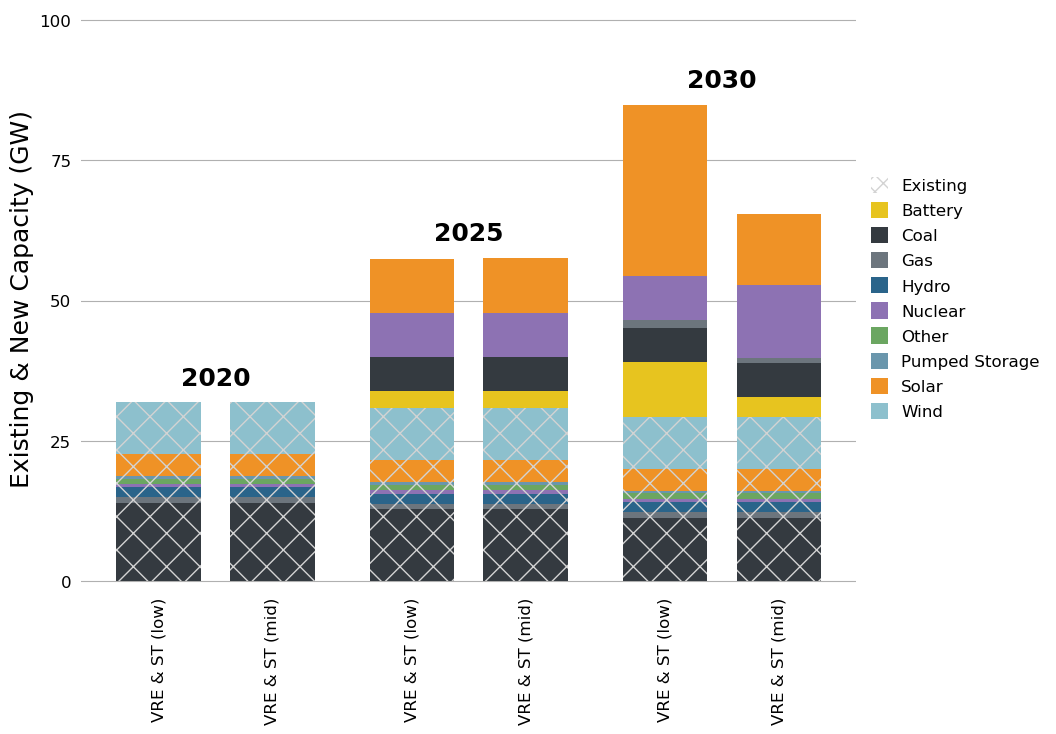

In [13]:
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity.png')

In [14]:
dispatch_         = _load_energy_dispatch(scen_labels_, path_to_scenarios, gp_model = 'capex')
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,Energy
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Coal,Tamil_Nadu,5.826379e+07
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Gas,Tamil_Nadu,2.257936e+06
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Diesel,Tamil_Nadu,0.000000e+00
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Hydro,Tamil_Nadu,3.815683e+06
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Other,Tamil_Nadu,7.967328e+06
...,...,...,...,...,...
91,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Export,Tamil_Nadu,0.000000e+00
92,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Curtailment,Tamil_Nadu,0.000000e+00
93,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tx_Losses,Tamil_Nadu,-3.495529e+05
94,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Import,Tamil_Nadu,4.993613e+06


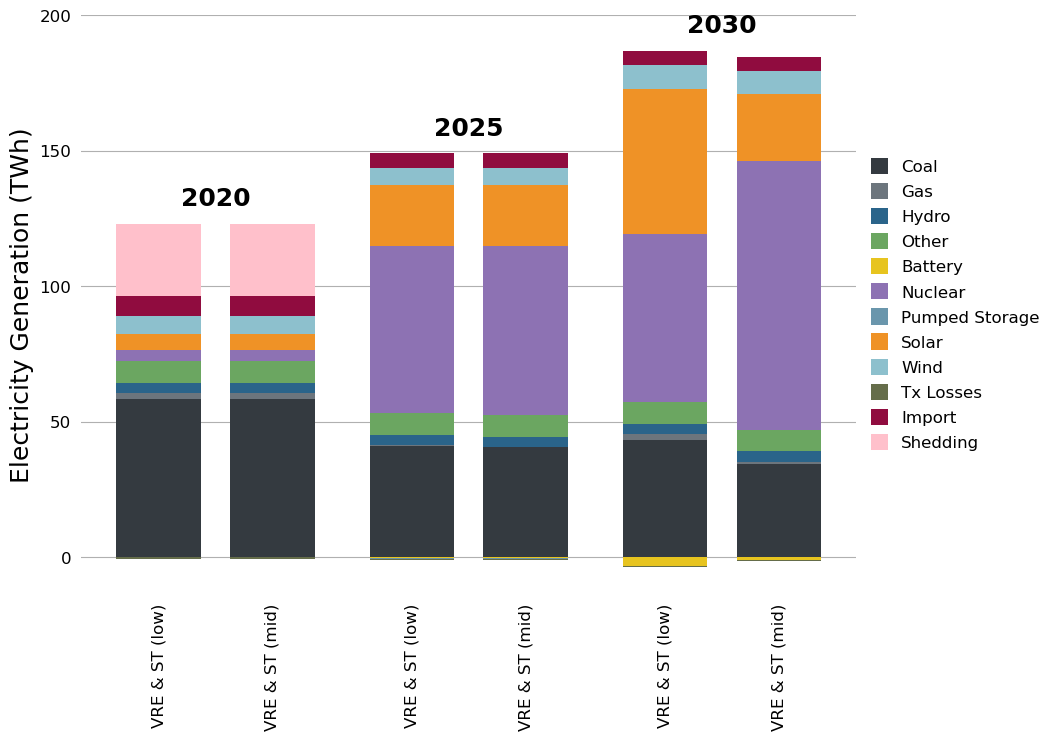

In [15]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation.png')

In [16]:
ed_ = _processing_energy_dispatch(scen_labels_, path_to_scenarios, model = 'capex')
ed_ = _group_dispatch_technologies_by_zone_and_date_production(ed_, tech_labels_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


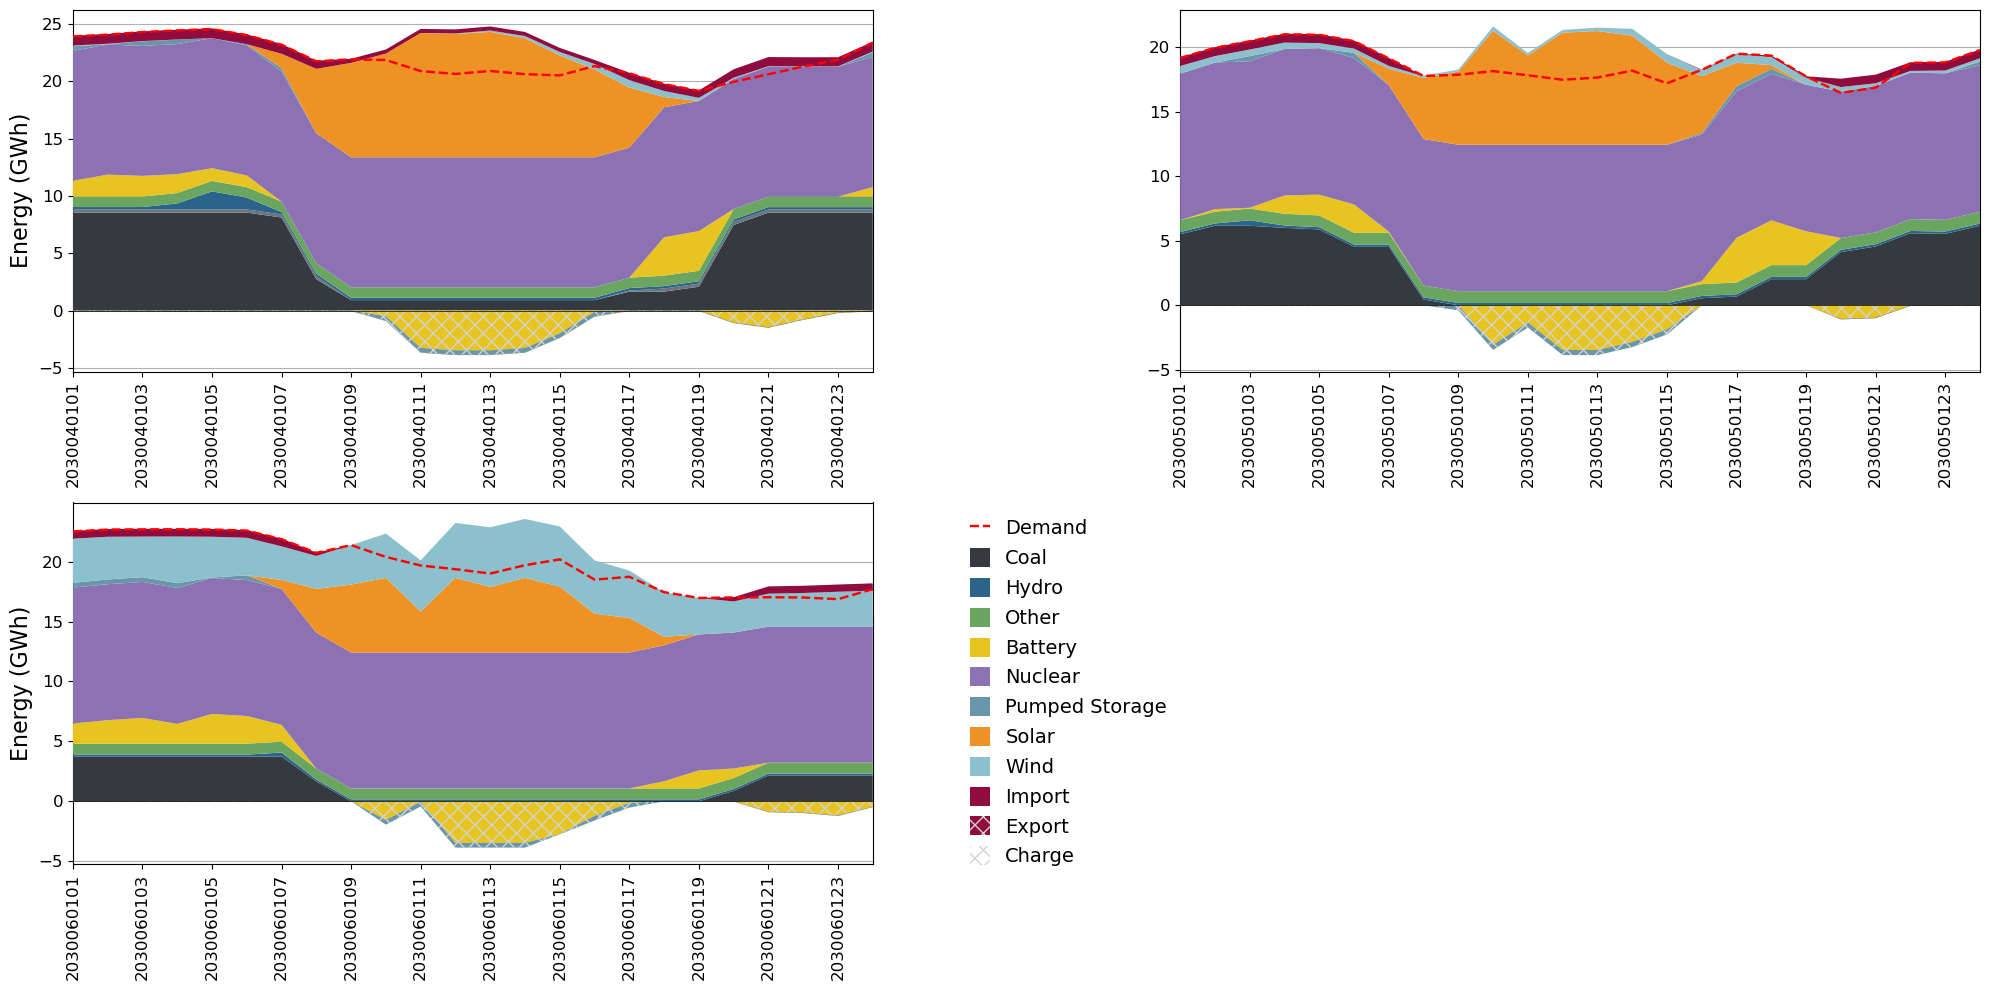

In [17]:
# Plot energy dispatch for a given day
_plot_zone_energy_dispatch_production(ed_, scen_labels_, tech_labels_, dispatch_labels_,
                                      save      = True,
                                      legend    = True,
                                      file_name = directory + r'/plots/energy_dispatch.png')

In [18]:
emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios, gp_model = 'capex')
emissions_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Technology,Zone,GHG
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Battery,Tamil_Nadu,0.000000e+00
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Biomass,Tamil_Nadu,0.000000e+00
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,CCGT,Tamil_Nadu,9.451721e+05
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,CT,Tamil_Nadu,0.000000e+00
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Hydro_Pumped,Tamil_Nadu,0.000000e+00
...,...,...,...,...,...
91,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,SolarPV_tilt,Tamil_Nadu,0.000000e+00
92,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Subcritical_Coal_Large,Tamil_Nadu,5.807108e+06
93,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Subcritical_Coal_Small,Tamil_Nadu,7.637499e+06
94,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Supercritical_Coal,Tamil_Nadu,1.971801e+07


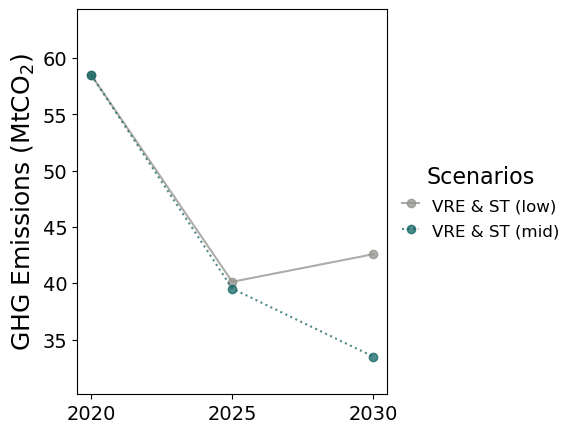

In [19]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions.png')

In [20]:
intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Zone,Period,GHG,Load,Intensity
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2020,5.848026e+07,1.223677e+08,0.477906
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2025,4.012537e+07,1.481464e+08,0.270849
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2030,4.257421e+07,1.831572e+08,0.232446
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2020,5.848026e+07,1.223677e+08,0.477906
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2025,3.952734e+07,1.481464e+08,0.266813
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,Tamil_Nadu,2030,3.348380e+07,1.831572e+08,0.182815


Plot system Levelized Cosst of Electricity (LCOE) for different scenarios

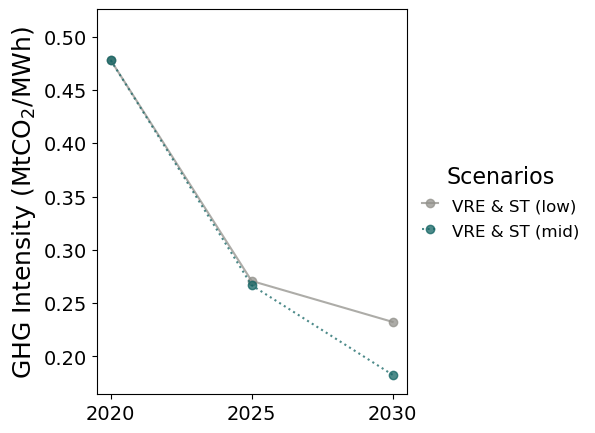

In [21]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity.png')

In [22]:
system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios, gp_model = 'capex')
system_cost_

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Tx_Costs,Cost,LCOE
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Tamil_Nadu,3401853012.493683,3184222192.264765,1.223677e+08,0.0,6.586075e+09,53.822022
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2025,Tamil_Nadu,4249640068.9843383,6654368739.986953,1.481464e+08,0.0,1.090401e+10,73.602940
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tamil_Nadu,4584982570.561745,8245560622.583776,1.831572e+08,0.0,1.283054e+10,70.052069
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2020,Tamil_Nadu,3401853012.493683,3184222192.264765,1.223677e+08,0.0,6.586075e+09,53.822022
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2025,Tamil_Nadu,4237260177.101016,6729573321.555292,1.481464e+08,0.0,1.096683e+10,74.027012
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_...,2030,Tamil_Nadu,5147847520.646449,7951357423.960751,1.831572e+08,0.0,1.309920e+10,71.518905


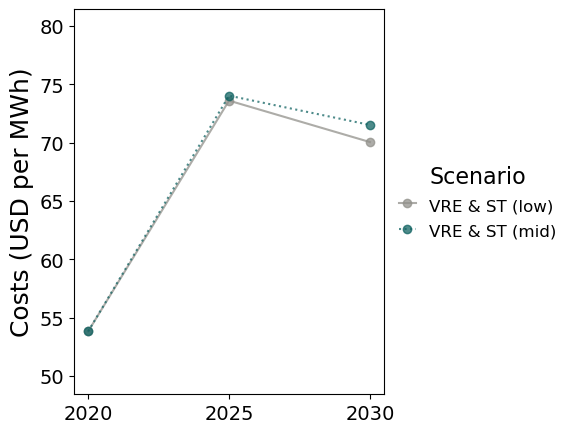

In [23]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (USD per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost.png')

In [24]:
# Replace with a specific scenario if needed, otherwise leave blank
scenario = 'VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple' 
# Replace with 'new' or existing' so only new capacity is shown, otherwise leave blank for new and existing
status = 'new' 
filtered_capacity_ = _filter_capacity(grouped_capacity_, scenario, status)
filtered_capacity_

Scenario      Technology  \
Period                     
0                Battery   
1                   Coal   
2            Curtailment   
3                 Diesel   
4                 Export   
5                    Gas   
6                  Hydro   
7               Hydrogen   
8                 Import   
9                Nuclear   
10                 Other   
11        Pumped Storage   
12              Shedding   
13                 Solar   
14             Tx_Losses   
15                  Wind   

Scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple  \
Period                                                                       2020   
0                                                       0.0                         
1                                                       0.0                         
2                                                       0.0                         
3                                                       0.0                         
4                                                       0.0                         
5                                                       0.0                         
6                                                       0.0                         
7                                                       0.0                         
8                                                       0.0                         
9                                                       0.0                         
10                                                      0.0                         
11                                                      0.0                         
12                                                      0.0                         
13                                                      0.0                         
14                                                      0.0                         
15                                                      0.0                         

Scenario                         
Period         2025        2030  
0         3068.5274   9654.6159  
1         6065.0000   6065.0000  
2            0.0000      0.0000  
3            0.0000      0.0000  
4            0.0000      0.0000  
5            0.0000   1484.2589  
6            0.0000      0.0000  
7            0.0000      0.0000  
8            0.0000      0.0000  
9         7912.5761   7912.5761  
10           0.0000      0.0000  
11           0.0000      0.0000  
12           0.0000      0.0000  
13        9617.8632  30438.6032  
14           0.0000      0.0000  
15           0.0000      0.0000